# Anomaly Detection Examples with R MASS road dataset by MT-Method

井出剛著「入門 機械学習による異常検知〜Rによる実践ガイド」P50-52 の例

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### データの読み込みと確認

In [2]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/MASS/road.csv'
df = pd.read_csv(url, index_col=0)

In [3]:
df

,deaths,drivers,popden,rural,temp,fuel
Alabama,968,158,64.0,66.0,62,119.0
Alaska,43,11,0.4,5.9,30,6.2
Arizona,588,91,12.0,33.0,64,65.0
Arkanas,640,92,34.0,73.0,51,74.0
Calif,4743,952,100.0,118.0,65,105.0
Colo,566,109,17.0,73.0,42,78.0
Conn,325,167,518.0,5.1,37,95.0
Dela,118,30,226.0,3.4,41,20.0
DC,115,35,12524.0,0.0,44,23.0
Florida,1545,298,91.0,57.0,67,216.0


In [4]:
m = df.to_numpy()

各列をdrivers列で割って運転者1人あたりの数値に変換

In [5]:
drivers = df['drivers'].copy()
for label, content in df.iteritems():
    df[label] = content / drivers

In [6]:
df

,deaths,drivers,popden,rural,temp,fuel
Alabama,6.126582,1.0,0.405063,0.417722,0.392405,0.753165
Alaska,3.909091,1.0,0.036364,0.536364,2.727273,0.563636
Arizona,6.461538,1.0,0.131868,0.362637,0.703297,0.714286
Arkanas,6.956522,1.0,0.369565,0.793478,0.554348,0.804348
Calif,4.982143,1.0,0.105042,0.123950,0.068277,0.110294
Colo,5.192661,1.0,0.155963,0.669725,0.385321,0.715596
Conn,1.946108,1.0,3.101796,0.030539,0.221557,0.568862
Dela,3.933333,1.0,7.533333,0.113333,1.366667,0.666667
DC,3.285714,1.0,357.828571,0.000000,1.257143,0.657143
Florida,5.184564,1.0,0.305369,0.191275,0.224832,0.724832


### 対数変換

各列に１を加えた上で対数変換

In [7]:
x = np.log(df[['deaths','popden', 'rural', 'temp', 'fuel']] + 1)
x

,deaths,popden,rural,temp,fuel
Alabama,1.963832,0.340082,0.349051,0.331033,0.561422
Alaska,1.591089,0.035718,0.429418,1.315677,0.447014
Arizona,2.009762,0.123869,0.309422,0.532566,0.538997
Arkanas,2.073992,0.314493,0.584157,0.441056,0.590199
Calif,1.788779,0.099883,0.116849,0.066047,0.104625
Colo,1.823365,0.144934,0.512659,0.325932,0.539761
Conn,1.080485,1.411425,0.030082,0.200126,0.450351
Dela,1.596015,2.143980,0.107359,0.861482,0.510826
DC,1.455287,5.882845,0.000000,0.814100,0.505095
Florida,1.822056,0.266486,0.175024,0.202804,0.545130


### 中心化

In [8]:
mx = np.mean(x, axis=0)

In [9]:
mx

deaths    1.858592
popden    0.668448
rural     0.348965
temp      0.367111
fuel      0.526476
dtype: float64

In [10]:
xc = x - mx

### 共分散行列の計算

In [11]:
sx = np.cov(xc, rowvar=False)

### 異常度の計算とプロット

In [12]:
a = np.sum(xc.dot(np.linalg.inv(sx)) * xc.to_numpy(), axis=1) / len(xc.columns)

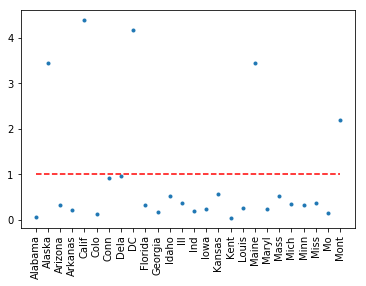

In [13]:
plt.plot(a, '.')
plt.plot(np.repeat(1, len(xc.index)), 'r--')
plt.xticks(rotation=90)
plt.show()

### カリフォルニア州のデータをサンプルにS/N比を計算

In [14]:
xc_prime = xc.loc['Calif']

In [15]:
sn = 10 * np.log10(xc_prime**2/np.diag(sx))

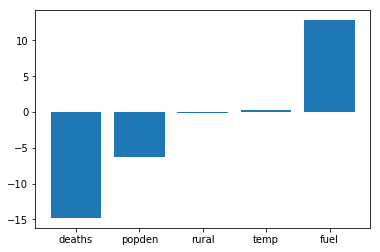

In [16]:
plt.bar(sn.index, sn)
plt.show()

### ワシントンDCの場合

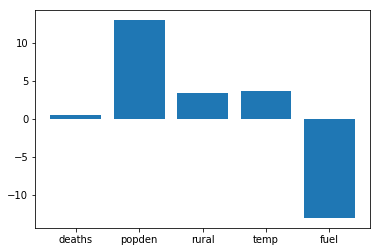

In [17]:
xc_prime = xc.loc['DC']
sn = 10 * np.log10(xc_prime**2/np.diag(sx))
plt.bar(sn.index, sn)
plt.show()